In [ ]:
pip install catboost scikit-learn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

# Загрузка данных и разделение на тестовую и обучающую выборки

In [3]:
# Загрузка датасета
data = pd.read_csv('IC50_data.csv')
data.head()

,"IC50, mM log10",MaxAbsEStateIndex,MaxAbsEStateIndex log10,MaxEStateIndex,MaxEStateIndex log10,MinAbsEStateIndex log10,MinEStateIndex,MinEStateIndex_log10_sign,SPS,SPS log10,...,fr_piperzine,fr_priamide,fr_pyridine,fr_quatN,fr_sulfonamd,fr_term_acetylene,fr_tetrazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0.795141,5.094096,0.707067,5.094096,0.707067,-0.412037,0.387225,0.142147,42.928571,1.632746,...,0,0,0,0,0,0,0,0,3,0
1,-0.112478,3.961417,0.597851,3.961417,0.597851,-0.272566,0.533868,0.185788,45.214286,1.655276,...,0,0,0,0,0,0,0,0,3,0
2,2.349877,2.627117,0.419479,2.627117,0.419479,-0.265016,0.543231,0.188431,42.187500,1.625184,...,0,0,0,2,0,0,0,0,3,0
3,0.231883,5.097360,0.707345,5.097360,0.707345,-0.408265,0.390603,0.143203,41.862069,1.621821,...,0,0,0,0,0,0,0,0,4,0
4,2.029917,5.150510,0.711850,5.150510,0.711850,-0.567871,0.270476,0.103966,36.514286,1.562463,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Разделение на признаки и целевую переменную
X = data.drop(columns=['IC50, mM log10'])
y = data['IC50, mM log10']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Модель CatBoostRegressor

**CatBoostRegressor** чаще всего используется, когда у есть категориальные признаки, которые нужно эффективно обрабатывать. Эта модель прекрасно справляется с высокоразмерными данными и часто демонстрирует высокую точность, минимизируя вероятность переобучения. К сильным сторонам CatBoost можно отнести его автоматическую обработку категориальных переменных и высокую скорость обучения, в то время как среди слабых сторон стоит отметить необходимость выбора параметров для достижения оптимального результата и достаточно большие требования к памяти.

In [7]:
# Инициализация и обучение модели CatBoostRegressor
CatBoost = CatBoostRegressor(
    iterations=1000,           # кол-во деревьев
    learning_rate=0.01,        # скорость обучения
    depth=5,                  # глубина дерева;
    verbose=0,                # отключить вывод логов
)
CatBoost.fit(X_train, y_train)

In [8]:
# Предсказание на тестовой выборке
y_pred_CatBoost = CatBoost.predict(X_test)

In [9]:
# Оценка качества модели (MSE)
mse_CatBoost = mean_squared_error(y_test, y_pred_CatBoost)
print(f'MSE: {mse_CatBoost:.4f}')

# Корень из MSE для получения RMSE
rmse_CatBoost = np.sqrt(mse_CatBoost)
print(f'RMSE: {rmse_CatBoost:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_CatBoost = mean_absolute_error(y_test, y_pred_CatBoost)
print(f'MAE: {mae_CatBoost:.4f}')

# Коэффициент детерминации (R²)
r2_CatBoost = r2_score(y_test, y_pred_CatBoost)
print(f'R²: {r2_CatBoost:.4f}')

MSE: 0.3923
RMSE: 0.6264
MAE: 0.5000
R²: 0.5365


Были получены следующие метрики качества модели CatBoost:

Среднеквадратичная ошибка (MSE) составила 0.3923, корень из MSE (RMSE) — 0.6264, средняя абсолютная ошибка (MAE) — 0.5000. Коэффициент детерминации (R²) равен 0.5365, что говорит о том, что модель объясняет примерно 54% дисперсии целевой переменной на тестовой выборке.

В целом, показатели говорят о том, что модель успешно выявила значимую часть взаимосвязей в данных, однако остается потенциал для дальнейшего повышения точности за счет подбора признаков, настройки гиперпараметров либо использования ансамблей разных алгоритмов.й.

# Модель LinearRegression (линейная регрессия)

**LinearRegression** применяется в ситуациях, когда данные хорошо поддаются линейному моделированию. Эта модель проста в интерпретации и очень быстрая в обучении. Сильные стороны включают простоту и возможность понимания модели, а среди недостатков – невозможность эффективно работать с нелинейными зависимостями и чувствительность к выбросам.

In [10]:
# Создание и обучение модели
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [11]:
# Предсказание на тестовой выборке
y_pred_LinReg = LinReg.predict(X_test)

In [12]:
# Оценка качества модели (MSE)
mse_LinReg = mean_squared_error(y_test, y_pred_LinReg)
print(f'MSE: {mse_LinReg:.4f}')

# Корень из MSE для получения RMSE
rmse_LinReg = np.sqrt(mse_LinReg)
print(f'RMSE: {rmse_LinReg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_LinReg = mean_absolute_error(y_test, y_pred_LinReg)
print(f'MAE: {mae_LinReg:.4f}')

# Коэффициент детерминации (R²)
r2_LinReg = r2_score(y_test, y_pred_LinReg)
print(f'R²: {r2_LinReg:.4f}')

MSE: 0.3437
RMSE: 0.5863
MAE: 0.4572
R²: 0.5939


После обучения модели линейной регрессии были получены следующие метрики: среднеквадратичная ошибка (MSE) составила 0.3437, квадратный корень из MSE (RMSE) — 0.5863, средняя абсолютная ошибка (MAE) — 0.4572, коэффициент детерминации R² — 0.5939.

Эти результаты свидетельствуют о том, что модель объясняет примерно 59% дисперсии целевой переменной, а ошибка предсказаний относительно невелика, учитывая логарифмированную шкалу. Модель демонстрирует адекватное качество предсказаний, однако остается потенциал для дальнейшего улучшения за счет подбора признаков или применения более сложных алгоритмов.

# Модель DecisionTreeRegressor (регрессия лесом решений)

**DecisionTreeRegressor** полезна для работы с непрерывными и категориальными данными и не требует предварительной обработки (например, нормализации). Сильными сторонами данной модели являются легкость в интерпретации, а также способность захватывать сложные, нелинейные зависимости. Однако дерево решения склонно к переобучению, что является его слабой стороной, особенно при недостатке данных.

In [13]:
# Создание и обучение модели
tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor()

In [21]:
# Предсказание на тестовой выборке
y_pred_tree_model = tree_model.predict(X_test)

In [23]:
# Оценка качества модели (MSE)
mse_tree_model = mean_squared_error(y_test, y_pred_tree_model)
print(f'MSE: {mse_tree_model:.4f}')

# Корень из MSE для получения RMSE
rmse_tree_model = np.sqrt(mse_tree_model)
print(f'RMSE: {rmse_tree_model:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_tree_model = mean_absolute_error(y_test, y_pred_tree_model)
print(f'MAE: {mae_tree_model:.4f}')

# Коэффициент детерминации (R²)
r2_tree_model = r2_score(y_test, y_pred_tree_model)
print(f'R²: {r2_tree_model:.4f}')

MSE: 0.0977
RMSE: 0.3125
MAE: 0.1155
R²: 0.8846


Полученные метрики на тестовой выборке следующие: среднеквадратичная ошибка (MSE) — 0.0977, корень из MSE (RMSE) — 0.3125, средняя абсолютная ошибка (MAE) — 0.1155 и объясненная дисперсия (R²) — 0.8846. Высокий R² указывает на то, что модель хорошо описывает данные.

Однако учитывая высокое значение R² и то, что DecisionTreeRegressor склонен к переобучению, особенно при работе с большим количеством признаков и сравнительно небольшим объемом данныно возникает подозрение на переобучение. Это может проявляться в слишком хороших результатах на тренировочных данных и ухудшении обобщающей способности на новых данных.

Для проверки переобучения рекомендуется провести кросс-валидацию и сравнить показатели качества на обучающей и тестовой выбор В таком случае требуются дополнительные данные.ках.

# Модель Gradient Boosting (градиентный бустинг)

**Gradient Boosting** часто используется в ситуациях с большим количеством данных, где важна высокая точность. Эта модель помогает уменьшить ошибку за счет последовательного обучения. К сильным сторонам можно отнести гибкость и возможность обрабатывать сложные зависимости в данных. Тем не менее, среди её слабостей – высокая вычислительная сложность и возможность переобучения.

In [25]:
# Создание и обучение модели
gb_model = GradientBoostingRegressor()
gb_model.fit(X, y)

GradientBoostingRegressor()

In [26]:
# Предсказание на тестовой выборке
y_pred_gb = gb_model.predict(X_test)

In [27]:
# Оценка качества модели (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'MSE: {mse_gb:.4f}')

# Корень из MSE для получения RMSE
rmse_gb = np.sqrt(mse_gb)
print(f'RMSE: {rmse_gb:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'MAE: {mae_gb:.4f}')

# Коэффициент детерминации (R²)
r2_gb = r2_score(y_test, y_pred_gb)
print(f'R²: {r2_gb:.4f}')

MSE: 0.2193
RMSE: 0.4683
MAE: 0.3712
R²: 0.7409


Модель Gradient Boosting демонстрирует удовлетворительные результаты на рассматриваемом датасете. В целом, модель показала достаточно хорошее качество предсказания: значение R² говорит о том, что модель объясняет около 74% дисперсии целевой переменной. Значения MSE, RMSE и MAE находятся на приемлемом уровне для задачи регрессии с логарифмированной целевой переменной.

# Модель полиномиальной регрессии

**Модель полиномиальной регрессии** лучше всего работает, когда данные имеют выраженную нелинейную зависимость. Она позволяет захватывать сложные взаимосвязи, что делает её полезной в ситуациях с криволинейными зависимостями. Сильные стороны полиномиальной регрессии включают её способность моделировать сложные функции, в то время как слабая сторона заключается в необходимости осторожного выбора степени полинома, чтобы избежать переобучения и потери интерпретируемости.

In [28]:
# Создание и обучение модели
degree = 2  # Степень полинома
polyreg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg_model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [32]:
# Предсказание на тестовой выборке
y_pred_polyreg = polyreg_model.predict(X_test)

In [33]:
# Оценка качества модели (MSE)
mse_polyreg = mean_squared_error(y_test, y_pred_polyreg)
print(f'MSE: {mse_polyreg:.4f}')

# Корень из MSE для получения RMSE
rmse_polyreg = np.sqrt(mse_polyreg)
print(f'RMSE: {rmse_polyreg:.4f}')

# Средняя абсолютная ошибка (MAE)
mae_polyreg = mean_absolute_error(y_test, y_pred_polyreg)
print(f'MAE: {mae_polyreg:.4f}')

# Коэффициент детерминации (R²)
r2_polyreg = r2_score(y_test, y_pred_polyreg)
print(f'R²: {r2_polyreg:.4f}')

MSE: 0.0977
RMSE: 0.3125
MAE: 0.1155
R²: 0.8846


Модель полиномиальной регрессии показала следующие метрики: среднеквадратичная ошибка (MSE) составила 0.0977, корень из среднеквадратичной ошибки (RMSE) — 0.3125, средняя абсолютная ошибка (MAE) — 0.1155, коэффициент детерминации (R²) — 0.8846. Эти значения говорят о хорошем качестве модели и высокой степени объяснённой дисперсии целевой переменной. Таким образом, модель продемонстрировала высокую точность на имеющихся данных.

# Сопоставление результатов

Для подведения итогов необходимо вывести наглядные графики.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


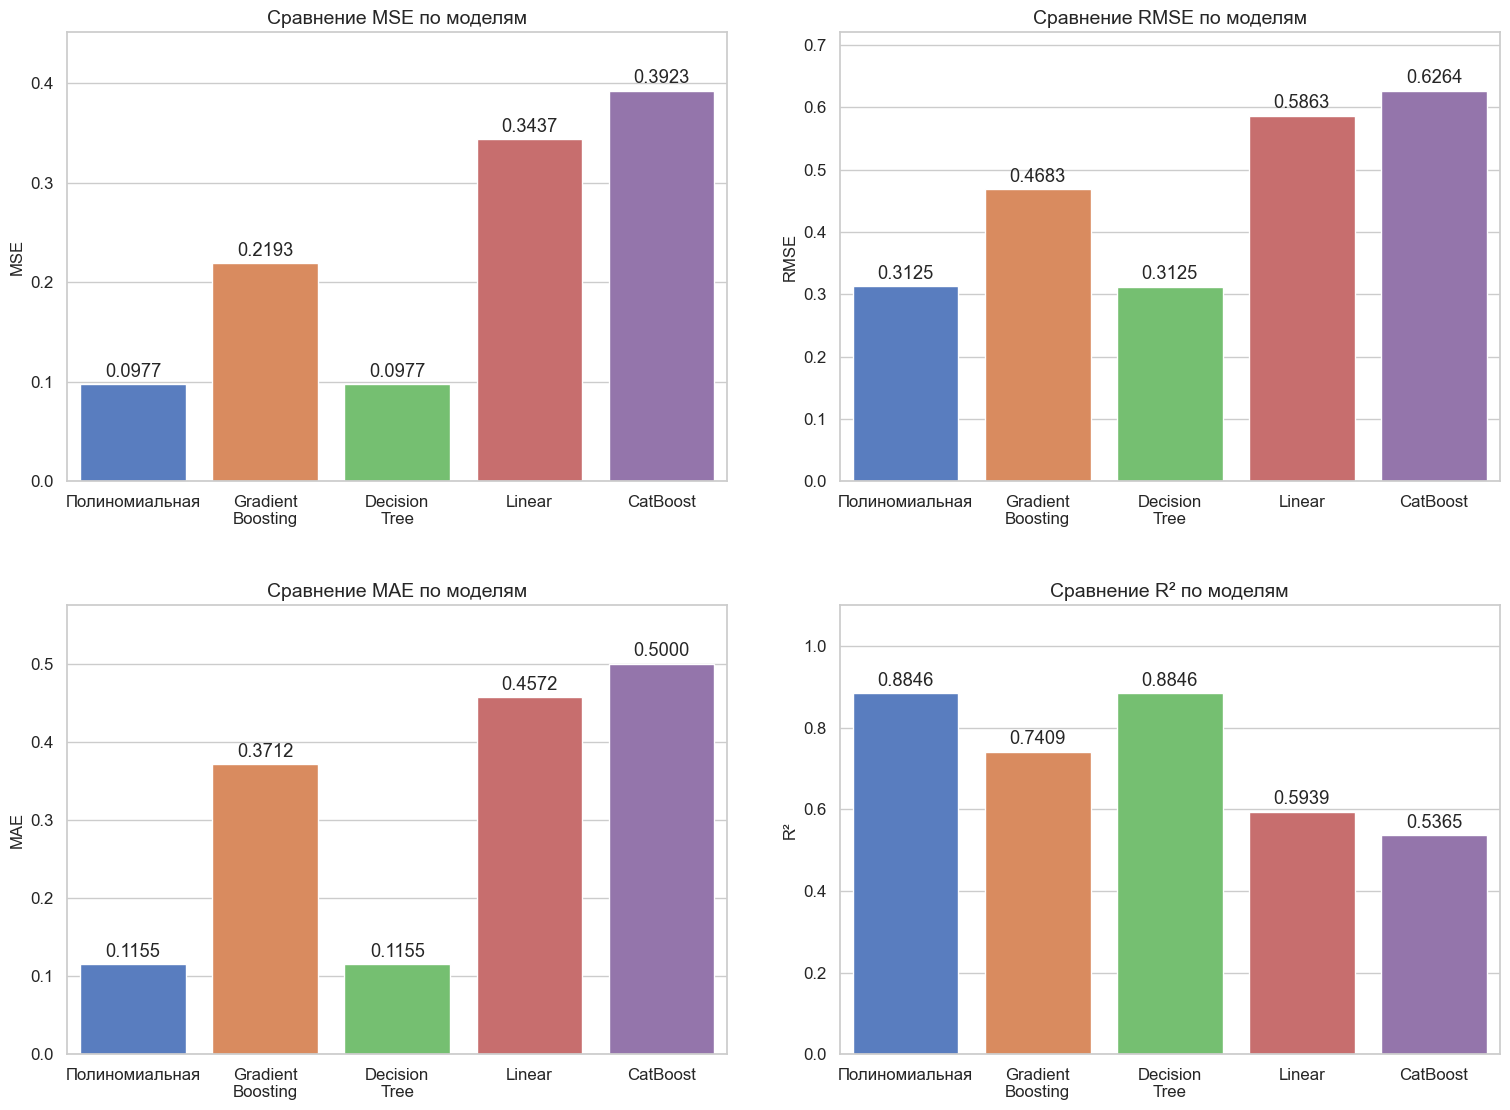

In [39]:
# Данные метрик (замените значения на реальные)
models = ['Полиномиальная', 'Gradient\nBoosting', 'Decision\nTree', 'Linear', 'CatBoost']

metrics = {
    'MSE': [mse_polyreg, mse_gb, mse_tree_model, mse_LinReg, mse_CatBoost],  # Пример значений
    'RMSE': [rmse_polyreg, rmse_gb, rmse_tree_model, rmse_LinReg, rmse_CatBoost],
    'MAE': [mae_polyreg, mae_gb, mae_tree_model, mae_LinReg, mae_CatBoost],
    'R²': [r2_polyreg, r2_gb, r2_tree_model, r2_LinReg, r2_CatBoost]
}

# Настройка стиля
sns.set(style="whitegrid", palette="muted", font_scale=1.1)
plt.figure(figsize=(16, 12))

# График для MSE
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=metrics['MSE'], hue=models, dodge=False)
plt.title('Сравнение MSE по моделям', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.ylim(0, max(metrics['MSE']) * 1.15)
plt.legend().remove()

# График для RMSE
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=metrics['RMSE'], hue=models, dodge=False)
plt.title('Сравнение RMSE по моделям', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.ylim(0, max(metrics['RMSE']) * 1.15)
plt.legend().remove()

# График для MAE
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=metrics['MAE'], hue=models, dodge=False)
plt.title('Сравнение MAE по моделям', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.ylim(0, max(metrics['MAE']) * 1.15)
plt.legend().remove()

# График для R2
plt.subplot(2, 2, 4)
bars = sns.barplot(x=models, y=metrics['R²'], hue=models, dodge=False)
plt.title('Сравнение R² по моделям', fontsize=14)
plt.ylabel('R²', fontsize=12)
plt.ylim(0, 1.1)

# Добавление значений на столбцы
for ax in plt.gcf().axes:
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.4f}", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center', 
            xytext=(0, 9), 
            textcoords='offset points')

plt.tight_layout(pad=3.0)
plt.show()

В результате анализа для прогнозирования значения целевой переменной IC50 наилучшие результаты продемонстрировали модели полиномиальной регрессии и регрессия с использованием метода леса решений. Тем не менее, существует вероятность, что успех модели леса решений может быть обусловлен переобучением, так как размер датасета составляет всего 1001 строчку и 349 столбцов, что создает условия для избыточной адаптации модели к обучающим данным.   

Полиномиальная регрессия показала такие впечатляющие результаты, вероятно, благодаря логарифмизации значений целевой переменной, что способствовало улучшению предсказательной способности этой модели. Полиномиальная регрессия представляет собой расширение линейной регрессии, которое позволяет моделировать сложные зависимости между переменными. Основное преимущество полиномиальной регрессии заключается в ее способности эффективно справляться с не линейными отношениями. В отличие от простой линейной модели, которая описывает зависимость в виде прямой линии, полиномиальная регрессия может использовать полиномы для более точного описания кривых и сложных паттернов в данных.  

Одним из ключевых аспектов является возможность подстраивания под характер данных. Благодаря включению полиномиальных терминов, таких как квадратичные и кубические, модель может лучше соответствовать форме распределения данных. Это особенно полезно, когда изучаемая зависимость имеет завитки или изменяющуюся скорость изменения.

В конечном итоге, хотя обе модели продемонстрировали хорошую эффективность, полиномиальная регрессия, похоже, оказалась более устойчивой и предпочтительной в данной задаче.

Модели градиентного бустинга, линейной регрессии и CatBoost показали себя сильно хуже, вероятно из-за в первую очередь недостаточного объёма данных для адекватного обучения более сложных алгоритмов. Кроме того, такие модели как градиентный бустинг и CatBoost обычно демонстрируют большие преимущества на больших объемах данных, где имеется необходимость выявлять сложные нелинейные взаимоотношения между признаками и целевой переменной. В нашем случае, ограниченность объема обучающего датасета могла привести к недообучению этих моделей или к их неспособности выявить значимые паттерны.

Таким образом, учитывая специфику поставленной задачи и характеристики имеющихся данных, модели полиномиальной регрессии и дерева решений доказали свою эффективность. Однако для получения более обоснованных результатов и уменьшения риска переобучения рекомендуется использовать более крупные и разнообразные датасеты, а также применять методы кросс-валидации и регуляризации, которые позволяют повысить обобщающую способность моделей и обеспечить более надежные прогнозы.